<a href="https://colab.research.google.com/github/eduardadelavle/Machine-Learning/blob/main/deeplearning_roupas-sapatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from keras.models import model_from_json
import matplotlib.pyplot as plt
import numpy as np

Importando o dataset e separando entre treinamento e teste (load_data)

In [2]:
dataset= keras.datasets.fashion_mnist
((imagens_treino, classes_treino), (imagens_teste, classes_teste))=dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


imagens de Treino: 60000
imagens de Treino: (60000, 28, 28)
imagens de Teste: (10000, 28, 28)
Classes de Treino: (60000,)
Min:  0
Max:  9


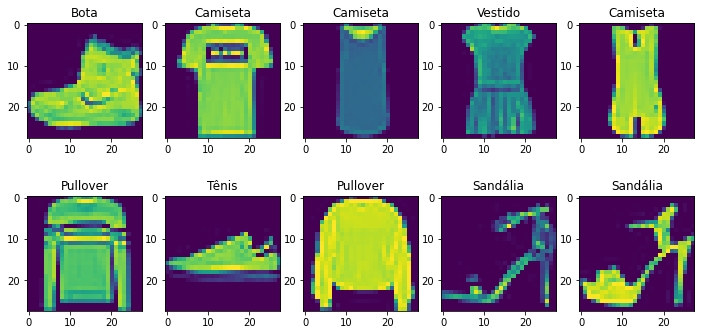

In [3]:
print("imagens de Treino:", len(imagens_treino))
print("imagens de Treino:", imagens_treino.shape)
print("imagens de Teste:", imagens_teste.shape)
print("Classes de Treino:", classes_treino.shape)

print("Min: ", classes_treino.min())
print("Max: ", classes_treino.max())

nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

total_de_classificacoes=10

fig, axes = plt.subplots(figsize=(10,5))
fig.tight_layout()

for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificacoes[classes_treino[imagem]])

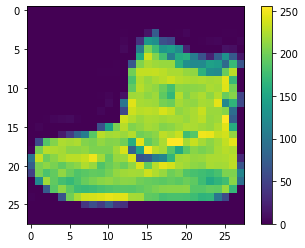

In [4]:
plt.imshow(imagens_treino[0])
plt.colorbar()

In [5]:
imagens_treino = imagens_treino/255
modelo = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dense(128, activation=tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

Treinamento

In [6]:
hist= modelo.fit(imagens_treino, classes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5607 - accuracy: 0.7998 - val_loss: 0.4084 - val_accuracy: 0.8528
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4202 - accuracy: 0.8453 - val_loss: 0.3656 - val_accuracy: 0.8637
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3849 - accuracy: 0.8576 - val_loss: 0.3571 - val_accuracy: 0.8710
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3582 - accuracy: 0.8676 - val_loss: 0.3396 - val_accuracy: 0.8761
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3450 - accuracy: 0.8723 - val_loss: 0.3466 - val_accuracy: 0.8692
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3313 - accuracy: 0.8755 - val_loss: 0.3268 - val_accuracy: 0.8812
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3224 - accuracy: 0.8803 - val_loss: 0.3302 - val_accuracy:

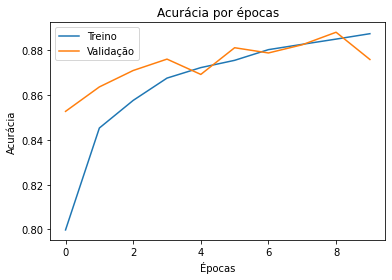

In [7]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

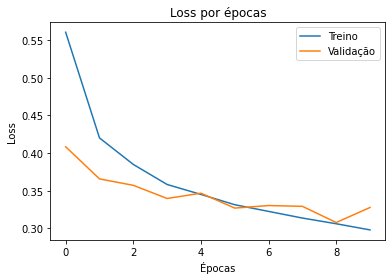

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss por épocas')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(['Treino', 'Validação'])

In [9]:
model_json = modelo.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)

modelo.save_weights("model.h5")
print("Modelo Salvo")

Modelo Salvo


In [10]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print("Modelo Carregado")

Modelo Carregado


In [11]:
loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

Testes


In [12]:
perda_teste, acuracia_teste = loaded_model.evaluate(imagens_teste, classes_teste)
print('Perda do teste: ', perda_teste)
print('Acurácia do teste: ', acuracia_teste)
testes=loaded_model.predict(imagens_teste/255)

313/313 [==============================] - 0s 1ms/step - loss: 48.9663 - accuracy: 0.8450
Perda do teste:  48.96627426147461
Acurácia do teste:  0.8450000286102295


In [14]:
x=0
arr=[]
for i in testes:
  #print(i)
  print(nomes_de_classificacoes[np.argmax(i)], np.max(i), nomes_de_classificacoes[classes_teste[x]])

  if (nomes_de_classificacoes[np.argmax(i)] != nomes_de_classificacoes[classes_teste[x]]):
    arr.append([nomes_de_classificacoes[np.argmax(i)], nomes_de_classificacoes[classes_teste[x]], imagens_teste[x]])
  x=x+1

A saída de streaming foi truncada nas últimas 5000 linhas.
Pullover 0.82891595 Pullover
Vestido 0.99997497 Vestido
Camisa 0.7314238 Camisa
Casaco 0.96859074 Casaco
Camisa 0.90172625 Camisa
Vestido 0.88478297 Vestido
Vestido 0.90392935 Camisa
Bota 0.99987996 Bota
Casaco 0.9418313 Casaco
Bota 0.85086125 Bota
Camiseta 0.9928768 Camiseta
Bolsa 0.9999113 Bolsa
Vestido 0.37552756 Vestido
Sandália 0.99916196 Sandália
Camisa 0.55345225 Camisa
Pullover 0.60187626 Pullover
Camiseta 0.9765569 Camiseta
Calça 1.0 Calça
Vestido 0.9952186 Vestido
Bota 1.0 Bota
Casaco 0.7317756 Casaco
Pullover 0.75042045 Pullover
Sandália 0.99804974 Sandália
Camisa 0.4285419 Camiseta
Sandália 0.9022696 Sandália
Calça 0.6226083 Vestido
Camisa 0.83962744 Pullover
Sandália 0.99776065 Sandália
Camisa 0.50737274 Camiseta
Camiseta 0.9030904 Camiseta
Camiseta 0.72007066 Camiseta
Camiseta 0.99964917 Camiseta
Camisa 0.65989137 Camiseta
Bota 0.99908996 Bota
Calça 1.0 Calça
Vestido 0.998971 Vestido
Vestido 0.99264175 Casaco
Pull

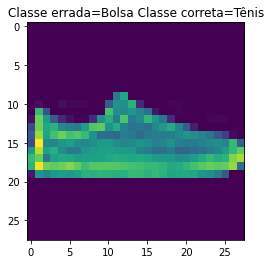

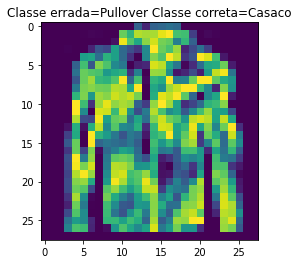

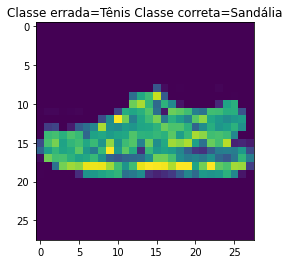

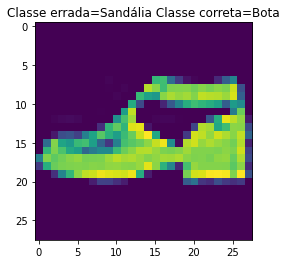

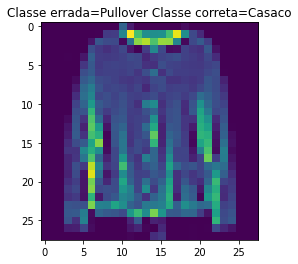

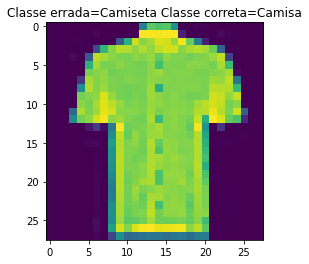

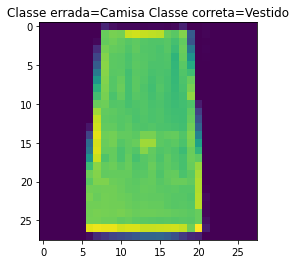

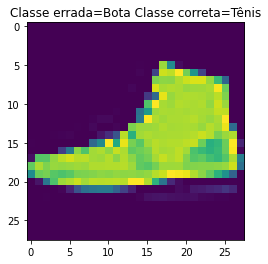

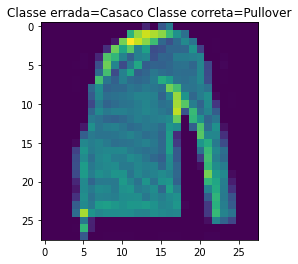

In [15]:
x=1
for i in arr:
    plt.subplots(1)
    plt.imshow(i[2])
    plt.title('Classe errada='+i[0]+' Classe correta='+i[1])
    x=x+1
    if x == 10:
        break